### Introduction to Gridding of In-Situ Climate Data: A Brief Exploration


In Session 5, we work with Argo data, specifically using already gridded fields. Argo is a global network of aproximately [4000 drifting ocean floats](https://www.marine.ie/site-area/infrastructure-facilities/marine-research-infrastructures/argo-network) that measure temperature, salinity, and other variables at different depths in the world's oceans. These floats provide invaluable point measurements from the surface to about 2,000 meters depth, allowing scientists to monitor ocean conditions and understand climate processes.

However, since these measurements are irregularly spaced, mapping them onto a regular grid is necessary to analyze regional and global patterns. This process is known as interpolation or "gridding". Common methods for mapping include linear interpolation, where values between points are estimated directly, and objective mapping (also known as optimal interpolation), which takes into account the spatial correlation between points and provides an uncertainty estimate for each grid box.

Here, we simulate the mapping process using random data (each time you execute the notebook, different results are generated).  We start with point measurements and demonstrate simple linear interpolation as well as a more sophisticated approach using objective mapping (approximated with a Gaussian filter for simplicity). This provides insight into how raw in-situ measurements can be transformed into gridded fields for further analysis.

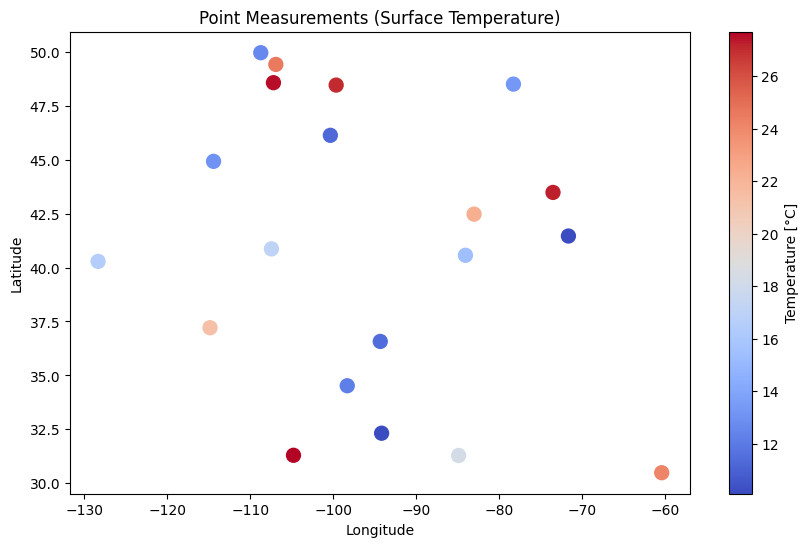

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# We create random dummy data representing point measurements of temperature
# Latitude and Longitude points (random points over a region)
lat_points = np.random.uniform(30, 50, 20)  # Random latitudes between 30° and 50°
lon_points = np.random.uniform(-130, -60, 20)  # Random longitudes between -130° and -60°
temp_points = np.random.uniform(10, 30, 20)  # Random temperatures between 10°C and 30°C

# Plot of the original point measurements
plt.figure(figsize=(10, 6))
plt.scatter(lon_points, lat_points, c=temp_points, cmap='coolwarm', s=100)
plt.colorbar(label='Temperature [°C]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Point Measurements (Surface Temperature)')
plt.show()


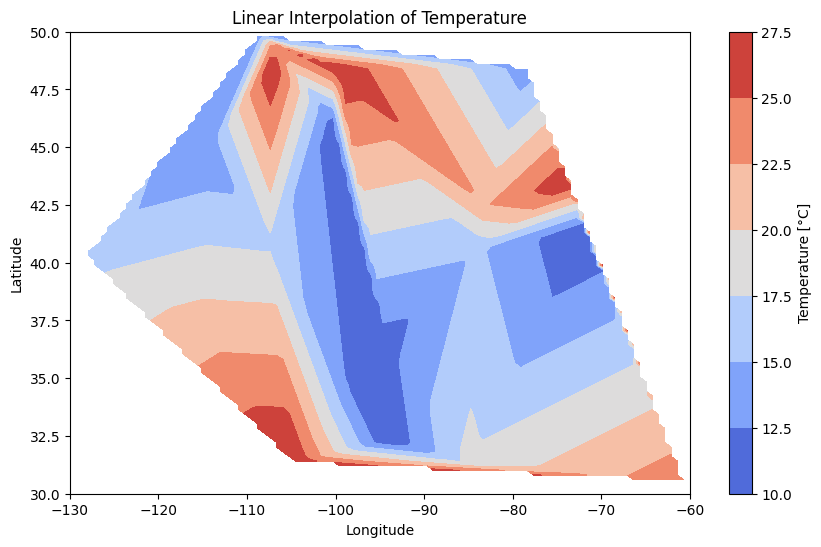

In [2]:
# We create a grid for interpolation
lon_grid = np.linspace(-130, -60, 100)
lat_grid = np.linspace(30, 50, 100)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# And perform linear interpolation
linear_interp = griddata((lon_points, lat_points), temp_points, (lon_grid, lat_grid), method='linear')

# Plot of the result of linear interpolation
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, linear_interp, cmap='coolwarm')
plt.colorbar(label='Temperature [°C]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Linear Interpolation of Temperature')
plt.show()


In climate data gridding, objective mapping (or optimal interpolation) is often used. This method relies on statistical models that account for spatial correlations between data points. For example, in Argo data, correlation scales are ~300-400 km in latitude and longitude. The method assigns weights to observations based on their distance from the grid point and the expected correlation. Importantly, objective mapping not only provides interpolated values but also an uncertainty estimate for each grid point, reflecting how reliable the interpolation is at that location.

In this example, we use a Gaussian filter as a simpler approximation of objective mapping. The Gaussian filter smooths the data by giving more weight to nearby points and less to distant ones, but it lacks the statistical rigor of objective mapping, particularly the ability to estimate uncertainties. While the Gaussian filter is not a full replacement, it suffices here to demonstrate the basic concept of spatial weighting.

In the Gaussian Filter,sigma represents the standard deviation of the Gaussian distribution used for smooting. 
- small sigma -> less smotting, nearby points influence the interpolation more strongly
- large sigma -> more smoothing, even more distant pointsinfluence the interolated values

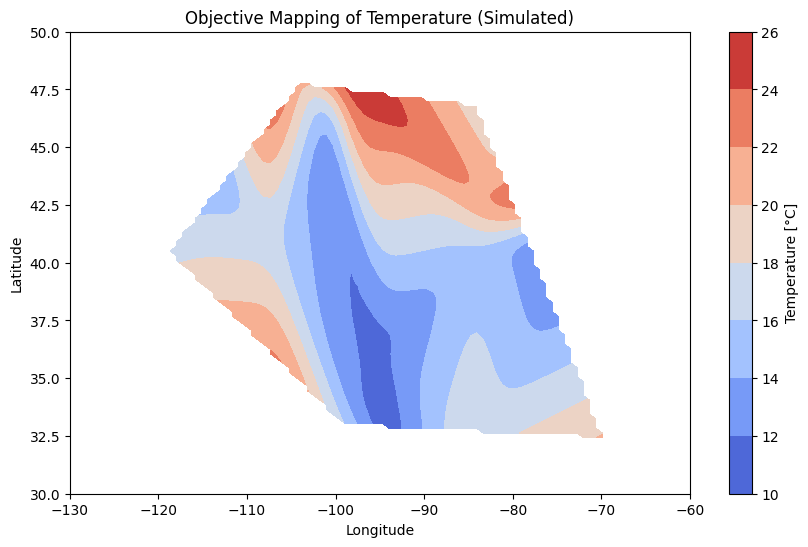

In [3]:
# Objective mapping (for simplicity, we'll simulate it as Gaussian smoothing)
from scipy.ndimage import gaussian_filter

# Simulating objective mapping by applying a Gaussian filter to the interpolated data
objective_map = gaussian_filter(linear_interp, sigma=2,mode = 'mirror') 
# Step 7: Plot the result of objective mapping
plt.figure(figsize=(10, 6))
plt.contourf(lon_grid, lat_grid, objective_map, cmap='coolwarm')
plt.colorbar(label='Temperature [°C]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Objective Mapping of Temperature (Simulated)')
plt.show()